In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [24]:
a = pd.read_csv("FuelConsumption.csv")
a.head()
a.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [25]:
from sklearn import preprocessing

In [26]:
b = a[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
b.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


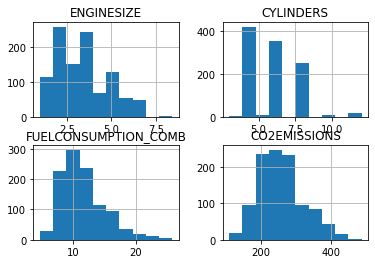

In [27]:
viz= b[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

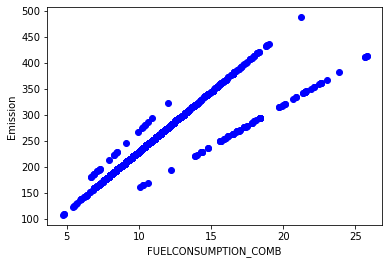

In [28]:
plt.scatter(b.FUELCONSUMPTION_COMB, b.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

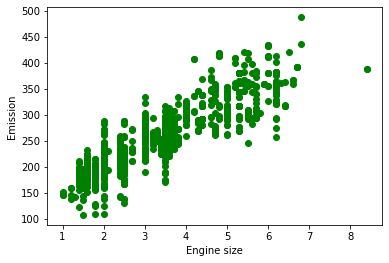

In [29]:
plt.scatter(b.ENGINESIZE, b.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

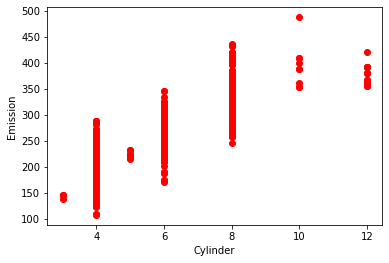

In [30]:
# write your code here
plt.scatter(b.CYLINDERS, b.CO2EMISSIONS, color='red')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [10]:
msk = np.random.rand(len(b)) < 0.8
train = b[msk]
test = b[~msk]
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
12,5.9,12,15.6,359
13,5.9,12,15.6,359
14,4.7,8,14.7,338
16,4.7,8,14.7,338
19,2.0,4,8.8,202


from sklearn import linear_model

In [31]:
from sklearn import linear_model
r=linear_model.LinearRegression()

In [21]:
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train['CO2EMISSIONS'])
r.fit(train_x,train_y)
print('Coefficient: ',r.coef_)
print('intercept: ',r.intercept_)

Coefficient:  [39.15805176]
intercept:  124.8095941333248


In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = r.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 66.30
Residual sum of squares (MSE): 6875.21
R2-score: 0.68
